In [1]:
# for colab only
!pip install pyspark --quiet
from google.colab import drive
drive.mount('/content/gdrive')


     |████████████████████████████████| 281.3 MB 39 kB/s 
     |████████████████████████████████| 199 kB 44.9 MB/s 
Mounted at /content/gdrive


In [2]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import *
import numpy as np

In [3]:
sc = SparkContext()
spark = SparkSession.builder.appName('clustering').getOrCreate()

In [4]:
df = spark.read.csv('/content/gdrive/MyDrive/Colab Notebooks/data.csv', header = True, inferSchema = True)
df.show()

+----------------+-------+--------+------+
|       Date/Time|    Lat|     Lon|  Base|
+----------------+-------+--------+------+
|9/1/2014 0:01:00|40.2201|-74.0021|B02512|
|9/1/2014 0:01:00|  40.75|-74.0027|B02512|
|9/1/2014 0:03:00|40.7559|-73.9864|B02512|
|9/1/2014 0:06:00| 40.745|-73.9889|B02512|
|9/1/2014 0:11:00|40.8145|-73.9444|B02512|
|9/1/2014 0:12:00|40.6735|-73.9918|B02512|
|9/1/2014 0:15:00|40.7471|-73.6472|B02512|
|9/1/2014 0:16:00|40.6613|-74.2691|B02512|
|9/1/2014 0:32:00|40.3745|-73.9999|B02512|
|9/1/2014 0:33:00|40.7633|-73.9773|B02512|
|9/1/2014 0:33:00|40.7467|-73.6131|B02512|
|9/1/2014 0:37:00|40.8105|  -73.96|B02512|
|9/1/2014 0:38:00| 40.679|-74.0111|B02512|
|9/1/2014 0:39:00|40.4023|-73.9839|B02512|
|9/1/2014 0:48:00|40.7378|-74.0395|B02512|
|9/1/2014 0:48:00|40.7214|-73.9884|B02512|
|9/1/2014 0:49:00|40.8646|-73.9081|B02512|
|9/1/2014 1:08:00|40.7398|-74.0061|B02512|
|9/1/2014 1:17:00|40.6793|-74.0116|B02512|
|9/1/2014 1:19:00|40.7328|-73.9875|B02512|
+----------

In [5]:
df.count()

4534327

# shuffling data

In [6]:
from pyspark.sql.functions import rand 
Df=df.orderBy(rand())
Df.show()

+------------------+-------+--------+------+
|         Date/Time|    Lat|     Lon|  Base|
+------------------+-------+--------+------+
| 4/29/2014 7:00:00|40.7223| -73.984|B02598|
|6/12/2014 16:49:00|40.7438|-74.0034|B02617|
| 4/24/2014 8:29:00|40.7434|-73.9768|B02682|
|7/15/2014 17:11:00|40.7721|-73.9562|B02512|
| 6/30/2014 9:09:00|40.7317|-73.9892|B02617|
|6/18/2014 18:45:00|40.7791|-73.9826|B02598|
| 6/3/2014 19:05:00|40.7269| -74.003|B02598|
|9/18/2014 18:47:00|40.7482|-73.9802|B02598|
|5/23/2014 19:20:00| 40.763|-73.9704|B02598|
| 6/2/2014 12:29:00| 40.752|-73.9935|B02598|
|  7/9/2014 7:46:00|40.6961|-73.9427|B02617|
| 9/4/2014 16:47:00|40.7321|-74.0005|B02617|
|9/27/2014 18:28:00|40.7353|-74.0099|B02617|
|7/13/2014 16:47:00|40.7296|-73.9987|B02598|
| 9/26/2014 9:41:00|40.8539|-73.9362|B02764|
| 4/11/2014 6:57:00|40.7397|-73.9813|B02598|
|  4/6/2014 2:31:00|40.7485|-73.9762|B02682|
| 5/21/2014 7:14:00| 40.744|-73.9764|B02598|
|5/27/2014 14:13:00|40.7277| -74.007|B02682|
| 6/4/2014

# picking 20% of data as DF

In [7]:
DF=Df.sample(0.2)
DF.show()

+------------------+-------+--------+------+
|         Date/Time|    Lat|     Lon|  Base|
+------------------+-------+--------+------+
|  7/9/2014 7:46:00|40.6961|-73.9427|B02617|
| 9/4/2014 16:47:00|40.7321|-74.0005|B02617|
|7/13/2014 16:47:00|40.7296|-73.9987|B02598|
|  8/8/2014 6:25:00|40.7642|-73.9617|B02617|
|9/14/2014 18:30:00|40.7236|-74.0107|B02598|
|8/30/2014 15:29:00|40.7786|-73.9821|B02617|
|7/21/2014 14:28:00|40.7969| -73.971|B02617|
| 9/4/2014 20:14:00|40.7685|-73.8625|B02764|
| 7/26/2014 7:48:00|40.7203|-73.9848|B02598|
|9/19/2014 16:37:00|40.7511|-73.9711|B02512|
|6/11/2014 10:48:00|40.7282|-73.9449|B02598|
|7/18/2014 15:04:00|40.8055|-73.9392|B02617|
| 4/9/2014 22:53:00|40.7641|-73.9706|B02682|
| 4/14/2014 8:12:00|40.7367|-73.9858|B02764|
|7/29/2014 18:39:00| 40.756|-73.9726|B02598|
| 9/10/2014 7:47:00|40.6963|-73.9877|B02617|
|4/29/2014 14:13:00|40.7567|-73.9808|B02598|
|9/12/2014 15:47:00|40.7164|-74.0129|B02617|
|8/16/2014 12:39:00|40.7665|-73.9783|B02617|
|6/24/2014

In [ ]:
DF.count()/Df.count()

0.19998204805255554

# clustering for K=2

In [8]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import *

kmeans = KMeans().setK(2).setSeed(1)
hasher = FeatureHasher(inputCols=["Lat", "Lon", "Base"],
                       outputCol="features")
transformed = hasher.transform(DF)

transformed.show(5, False)


+------------------+-------+--------+------+-----------------------------------------------------+
|Date/Time         |Lat    |Lon     |Base  |features                                             |
+------------------+-------+--------+------+-----------------------------------------------------+
|7/9/2014 7:46:00  |40.6961|-73.9427|B02617|(262144,[51008,101569,131243],[40.6961,1.0,-73.9427])|
|9/4/2014 16:47:00 |40.7321|-74.0005|B02617|(262144,[51008,101569,131243],[40.7321,1.0,-74.0005])|
|7/13/2014 16:47:00|40.7296|-73.9987|B02598|(262144,[51008,74483,131243],[40.7296,1.0,-73.9987]) |
|8/8/2014 6:25:00  |40.7642|-73.9617|B02617|(262144,[51008,101569,131243],[40.7642,1.0,-73.9617])|
|9/14/2014 18:30:00|40.7236|-74.0107|B02598|(262144,[51008,74483,131243],[40.7236,1.0,-74.0107]) |
+------------------+-------+--------+------+-----------------------------------------------------+
only showing top 5 rows



In [ ]:
model = kmeans.fit(transformed)
predictions = model.transform(transformed)
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)


Silhouette with squared euclidean distance = 0.5716747848984287
Cluster Centers: 
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
model.summary.trainingCost

1951881.451453553

# elbow method for k :2,3,...,20 by considering silhouette metric



In [16]:
import numpy as np
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import *
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sbs
from matplotlib.ticker import MaxNLocator
cost = np.zeros(20)
sil = np.zeros(20)
evaluator = ClusteringEvaluator()
for k in [2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = kmeans.fit(transformed)
    predictions = model.transform(transformed)
    sil[k] = evaluator.evaluate(predictions)
    cost[k]=model.summary.trainingCost
    print('k='+str(k),' done')


k=2  done
k=3  done
k=4  done
k=5  done
k=6  done
k=7  done
k=8  done
k=9  done
k=10  done


Py4JJavaError: ignored

array([0.        , 0.        , 0.57162146, 0.81862467, 0.94471265,
       0.99524133, 0.95150843, 0.83648498, 0.90187693, 0.9054522 ,
       0.75403144, 0.75429578, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

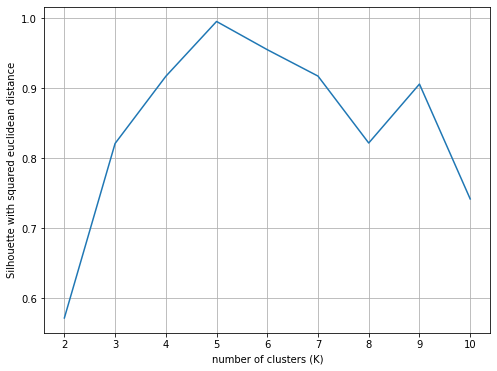

In [18]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sbs
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot([2,3,4,5,6,7,8,9,10],sil[2:11])
ax.set_xlabel('number of clusters (K)')
ax.set_ylabel('Silhouette with squared euclidean distance')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid()
plt.show()

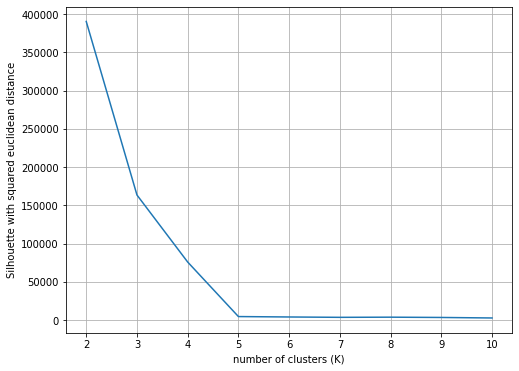

In [20]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sbs
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot([2,3,4,5,6,7,8,9,10],cost[2:11])
ax.set_xlabel('number of clusters (K)')
ax.set_ylabel('Silhouette with squared euclidean distance')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid()
plt.show()

# k=5 is the best value

In [21]:
kmeans = KMeans().setK(5).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(transformed)
predictions = model.transform(transformed)

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/py4j/clientserver.py", line 516, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.7/dist-packages/py4j/clientserver.py", line 540, in send_command
    "Error while sending or receiving", e, proto.ERROR_ON_RECEIVE)
py4j.protocol.Py4JNetworkError: Error while sending or receiving


Py4JError: ignored

In [22]:
predictions.groupBy("prediction").count().show()

ConnectionRefusedError: ignored

In [ ]:
predictions.show()

+----------------+-------+--------+------+--------------------+----------+
|       Date/Time|    Lat|     Lon|  Base|            features|prediction|
+----------------+-------+--------+------+--------------------+----------+
|9/1/2014 0:01:00|40.2201|-74.0021|B02512|(262144,[51008,64...|         4|
|9/1/2014 0:01:00|  40.75|-74.0027|B02512|(262144,[51008,64...|         4|
|9/1/2014 0:03:00|40.7559|-73.9864|B02512|(262144,[51008,64...|         4|
|9/1/2014 0:06:00| 40.745|-73.9889|B02512|(262144,[51008,64...|         4|
|9/1/2014 0:11:00|40.8145|-73.9444|B02512|(262144,[51008,64...|         4|
|9/1/2014 0:12:00|40.6735|-73.9918|B02512|(262144,[51008,64...|         4|
|9/1/2014 0:15:00|40.7471|-73.6472|B02512|(262144,[51008,64...|         4|
|9/1/2014 0:16:00|40.6613|-74.2691|B02512|(262144,[51008,64...|         4|
|9/1/2014 0:32:00|40.3745|-73.9999|B02512|(262144,[51008,64...|         4|
|9/1/2014 0:33:00|40.7633|-73.9773|B02512|(262144,[51008,64...|         4|
|9/1/2014 0:33:00|40.7467

In [ ]:
cnt=predictions.groupBy("prediction").count()

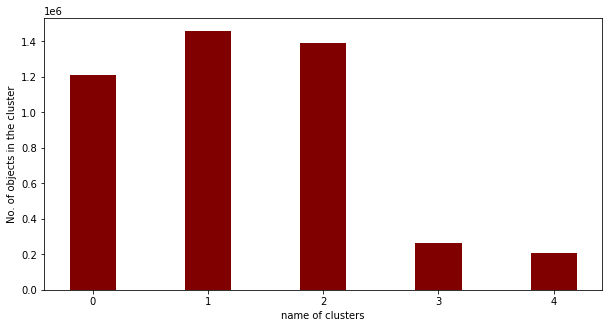

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

clusters =cnt.select('prediction').rdd.flatMap(lambda x: x).collect()
counter = cnt.select('count').rdd.flatMap(lambda x: x).collect()

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(clusters, counter, color ='maroon',
		width = 0.4)

plt.xlabel("name of clusters")
plt.ylabel("No. of objects in the cluster")
plt.show()


In [ ]:
import os, tempfile
model_path ="/content/model_k_5"
model.save(model_path)

In [ ]:
from google.colab import files
files.download('/content/model_k_5') 

In [ ]:
%cp /content/model_k_5 /content/gdrive\ Drive

In [ ]:
import os, tempfile
model_path ="/content/gdrive/MyDrive/clustering_model"
model.save(model_path)

In [ ]:
from pyspark.ml.clustering import KMeansModel
a=KMeansModel.load("/content/model_k_5")